In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.cluster import KMeans

# Bike Sharing Platform

In [2]:
bike = pd.read_csv("bike_data.csv")
bike

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,cnt,day
0,1,1,0,7,0,2,14.110847,80.5833,10.749882,31771,985,1
1,1,1,0,1,0,2,14.902598,69.6087,16.652113,32548,801,1
2,1,1,0,2,1,1,8.050924,43.7273,16.636703,59704,1349,1
3,1,1,0,3,1,1,8.200000,59.0435,10.739832,70635,1562,1
4,1,1,0,4,1,1,9.305237,43.6957,12.522300,73744,1600,1
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,5,1,2,10.420847,65.2917,23.458911,90698,2114,27
726,1,12,0,6,1,2,10.386653,59.0000,10.416557,119069,3095,28
727,1,12,0,7,0,2,10.386653,75.2917,8.333661,57421,1341,29
728,1,12,0,1,0,1,10.489153,48.3333,23.500518,69566,1796,30


In [3]:
bike.info()
# no missing values
# all columns are int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   month       730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weather     730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   wind        730 non-null    float64
 9   registered  730 non-null    int64  
 10  cnt         730 non-null    int64  
 11  day         730 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 68.6 KB


In [26]:
bike.describe()
# Checking descriptive statistics
# Very large range for cnt and registered

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,6.526027,0.028767,3.997260,0.683562,1.394521,20.319259,62.765175,12.763620,177741.953425,4508.006849,15.720548
std,1.110184,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,75773.087149,1936.011647,8.802278
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.424346,0.000000,1.500244,971.000000,22.000000,1.000000
25%,2.000000,4.000000,0.000000,2.000000,0.000000,1.000000,13.811885,52.000000,9.041650,121558.750000,3169.750000,8.000000
50%,3.000000,7.000000,0.000000,4.000000,1.000000,1.000000,20.465826,62.625000,12.125325,178020.500000,4548.500000,16.000000
75%,3.000000,10.000000,0.000000,6.000000,1.000000,2.000000,26.880615,72.989575,15.625589,232370.000000,5966.000000,23.000000
max,4.000000,12.000000,1.000000,7.000000,1.000000,3.000000,35.328347,97.250000,34.000021,337436.000000,8714.000000,31.000000


### 1.1 Exploratory data analysis

#### 1.1.1 create visualizations that show the relationship between ’cnt’ and the other variables

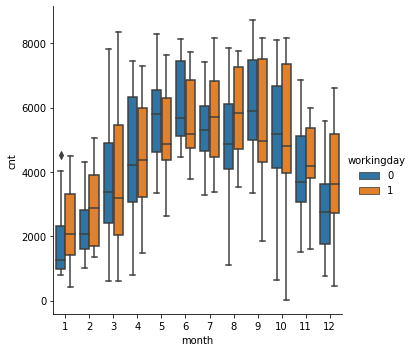

In [4]:
# cnt and month,workingday
sns.catplot(x="month",y="cnt",data=bike,kind="box",hue="workingday")

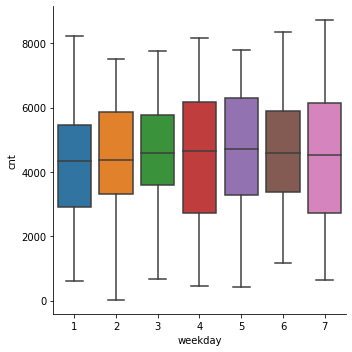

In [5]:
# cnt and weekday
sns.catplot(x="weekday",y="cnt",data=bike,kind="box")

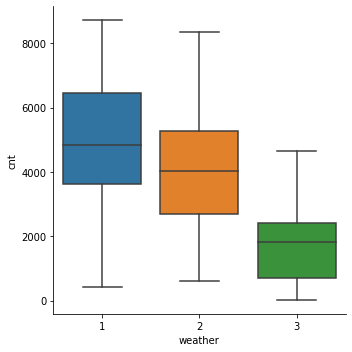

In [7]:
# cnt and weather
sns.catplot(x="weather",y="cnt",data=bike,kind="box")
# Weather will impact cnt.

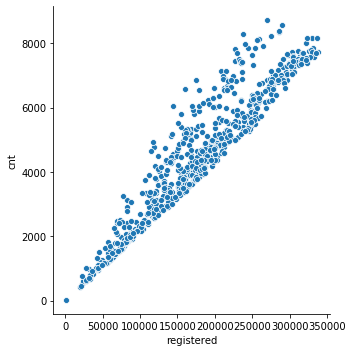

In [8]:
# cnt and registered
sns.relplot(x="registered",y="cnt",data=bike)
# registered is highly 

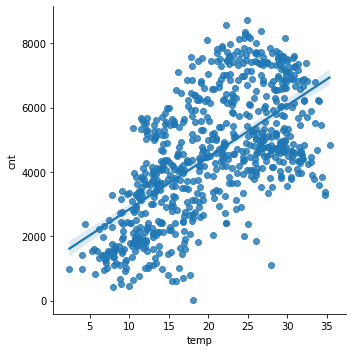

In [10]:
# cnt and temp
sns.lmplot(x="temp",y="cnt",data=bike)

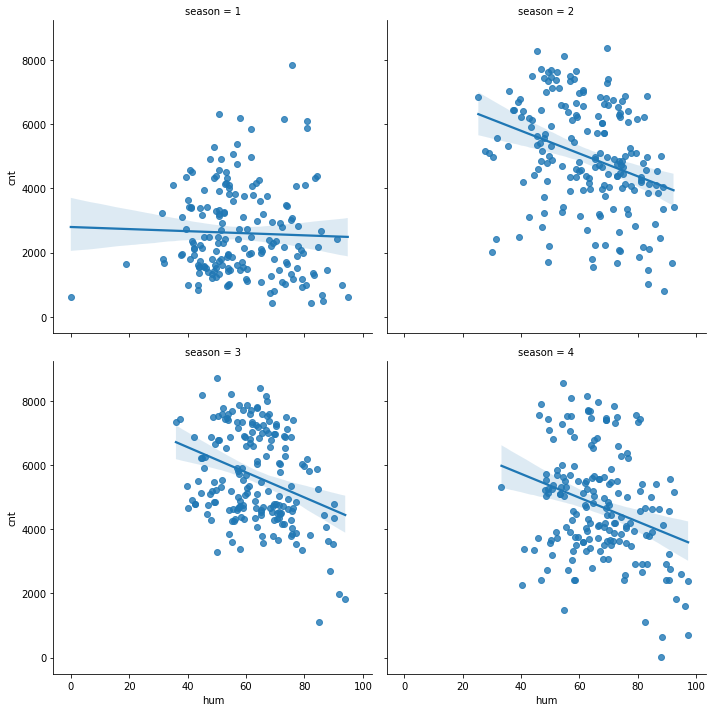

In [11]:
# cnt and hum and season
sns.lmplot(x="hum",y="cnt",data=bike,col="season",col_wrap=2)

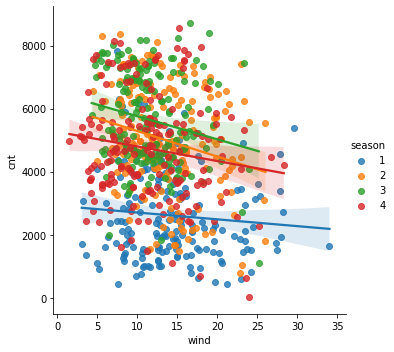

In [12]:
# cnt and wind
sns.lmplot(x="wind",y="cnt",data=bike,hue="season")

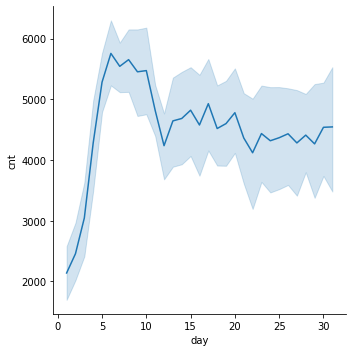

In [13]:
# cnt and day
sns.relplot(x="day",y="cnt",data=bike,kind="line")

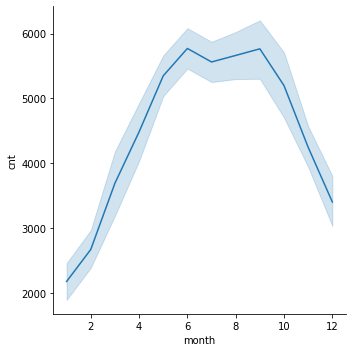

In [14]:
# cnt and month
sns.relplot(x="month",y="cnt",data=bike,kind="line")

#### 1.1.2  perform aggregation (check how average ’cnt’ varies across months, days, working days, and holidays)

In [15]:
# average cnt and month
bike["cnt"].groupby(bike.month).mean().sort_values()

month
1     2176.338710
2     2669.964286
12    3403.806452
3     3692.258065
11    4247.183333
4     4484.900000
10    5199.225806
5     5349.774194
7     5563.677419
8     5664.419355
9     5766.516667
6     5772.366667
Name: cnt, dtype: float64

In [16]:
# average cnt and days
bike.cnt.groupby(bike.day).mean().sort_values()

day
1     2139.708333
2     2456.875000
3     3045.000000
22    4119.291667
12    4235.541667
29    4265.227273
4     4278.833333
27    4281.083333
24    4316.916667
21    4363.125000
25    4366.708333
28    4409.666667
26    4431.666667
23    4435.166667
18    4518.208333
30    4538.409091
31    4544.642857
16    4576.541667
19    4599.458333
13    4643.666667
14    4683.583333
20    4779.041667
11    4816.166667
15    4819.875000
17    4927.291667
5     5281.333333
9     5451.875000
10    5471.916667
7     5542.083333
8     5652.083333
6     5754.791667
Name: cnt, dtype: float64

In [17]:
# average cnt and working days
bike.cnt.groupby(bike.workingday).mean()

workingday
0    4330.168831
1    4590.332665
Name: cnt, dtype: float64

In [18]:
# t-test
from scipy import stats


non_work = bike[bike.workingday==0].cnt
work = bike[bike.workingday==1].cnt
stats.ttest_ind(non_work,work)

# p>0.05 
# we can not reject that they are the same. 
# maybe the same, and maybe the average cnt working day is significantly larger than non workingday. it is not sure.

Ttest_indResult(statistic=-1.6907786191590892, pvalue=0.09130713322894805)

In [19]:
# average cnt and holidays
bike.cnt.groupby(bike.holiday).mean()

holiday
0    4530.90268
1    3735.00000
Name: cnt, dtype: float64

In [20]:
# t-test
non_ho = bike[bike.holiday==0].cnt
ho = bike[bike.holiday==1].cnt

stats.ttest_ind(non_ho,ho)

# p >0.05 
# can not reject they are the same.
# it is not sure that they are significantly different.


Ttest_indResult(statistic=1.8597495722808104, pvalue=0.06332412651800291)

In [21]:
bike.pivot_table(["cnt"],index=["month","day","workingday","holiday"]).sort_values(by="cnt")

,,,,cnt
month,day,workingday,holiday,
10,29,1,0,22.0
12,26,1,0,441.0
10,29,0,0,627.0
12,25,0,0,754.0
4,16,0,0,795.0
...,...,...,...,...
10,20,0,0,8090.0
5,19,0,0,8294.0
9,22,0,0,8395.0


In [22]:
bike.pivot_table(["cnt"],index=["workingday","holiday"]).sort_values(by="cnt")

# working day has the highest cnt, followed by weekends and then holiday 

cnt
workingday holiday             
0          1        3735.000000
           0        4389.685714
1          0        4590.332665

#### 1.1.3  calculate correlation of the variables.

In [23]:
bike.corr()["cnt"]

season        0.404584
month         0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weather      -0.295929
temp          0.627044
hum          -0.098543
wind         -0.235132
registered    0.945411
cnt           1.000000
day           0.041484
Name: cnt, dtype: float64

### 1.2 Develop a regression model that the company can use to predict the count of total rental bikes. Start with all the variables included in the data file, then follow the process suggested in the lectures to remove variables as long as you still find the model performance acceptable.

In [22]:
# move "cnt" column to the most right position
bike=bike[["season","month","holiday","weekday","workingday","weather","temp","hum","wind","registered","day","cnt"]]
bike

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,day,cnt
0,1,1,0,7,0,2,14.110847,80.5833,10.749882,31771,1,985
1,1,1,0,1,0,2,14.902598,69.6087,16.652113,32548,1,801
2,1,1,0,2,1,1,8.050924,43.7273,16.636703,59704,1,1349
3,1,1,0,3,1,1,8.200000,59.0435,10.739832,70635,1,1562
4,1,1,0,4,1,1,9.305237,43.6957,12.522300,73744,1,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,5,1,2,10.420847,65.2917,23.458911,90698,27,2114
726,1,12,0,6,1,2,10.386653,59.0000,10.416557,119069,28,3095
727,1,12,0,7,0,2,10.386653,75.2917,8.333661,57421,29,1341
728,1,12,0,1,0,1,10.489153,48.3333,23.500518,69566,30,1796


In [23]:
# Develop a regression model with all variables
bike_x,bike_y= bike[bike.columns[:11]],bike.cnt
x2 = sm.add_constant(bike_x)
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1764.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:31   Log-Likelihood:                -5343.6
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     718   BIC:                         1.077e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        571.1972    101.554      5.625      0.0

In [24]:
# remove highest p-value for each coefficient
# first "day" p-value= 0.769

x2 = sm.add_constant(bike_x.drop(["day"],axis=1))
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1943.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:31   Log-Likelihood:                -5343.7
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     719   BIC:                         1.076e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        566.9052    100.434      5.645      0.0

In [25]:
# remove highest p-value for each coefficient
# remove "season",p-value=0.598

x2 = sm.add_constant(bike_x.drop(["day","season"],axis=1))
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2161.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:31   Log-Likelihood:                -5343.8
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     720   BIC:                         1.075e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        563.9273    100.224      5.627      0.0

In [26]:
# remove highest p-value for each coefficient
# remove "weather",p-value=0.334

x2 = sm.add_constant(bike_x.drop(["day","season","weather"],axis=1))
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2431.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:31   Log-Likelihood:                -5344.3
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     721   BIC:                         1.075e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        567.6287    100.146      5.668      0.0

In [27]:
# removed "day","season",and "weather", the R-squared value stays the same 0.964, 
# and all other variables'p-value is below 0.05

# try to find multicollinearity 
bike_x.drop(["day","season","weather"],axis=1).corr()


,month,holiday,weekday,workingday,temp,hum,wind,registered
month,1.000000,0.018905,0.009523,-0.004688,0.219083,0.224937,-0.208013,0.291952
holiday,0.018905,1.000000,-0.101962,-0.252948,-0.028764,-0.015662,0.006257,-0.109142
weekday,0.009523,-0.101962,1.000000,0.035800,-0.000168,-0.052290,0.014283,0.057427
workingday,-0.004688,-0.252948,0.035800,1.000000,0.053470,0.023202,-0.018666,0.305437
temp,0.219083,-0.028764,-0.000168,0.053470,1.000000,0.128565,-0.158186,0.539436
hum,0.224937,-0.015662,-0.052290,0.023202,0.128565,1.000000,-0.248506,-0.089212
wind,-0.208013,0.006257,0.014283,-0.018666,-0.158186,-0.248506,1.000000,-0.217915
registered,0.291952,-0.109142,0.057427,0.305437,0.539436,-0.089212,-0.217915,1.000000


In [28]:
# no correlations are higher than 0.7, or lower than -0.7
# so this is the final model

x2 = sm.add_constant(bike_x.drop(["day","season","weather"],axis=1))
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2431.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:32   Log-Likelihood:                -5344.3
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     721   BIC:                         1.075e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        567.6287    100.146      5.668      0.0

### 1.3 Conclusions and Decisions.

### For example, higher temperature results in higher count, the company will need more bikes on higher temperature day, because the coefficient of temp is positive.